In [1]:
import os
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
df = pd.read_csv("../features/embeddings_using_word2vec.csv")
df.tail()

,File Number,Sentence Number,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 292,Feature 293,Feature 294,Feature 295,Feature 296,Feature 297,Feature 298,Feature 299,Feature 300,label
12725,969,17,-0.016267,0.235568,0.029791,0.216608,0.067931,-0.385285,0.159128,0.471750,...,0.248151,0.166786,-0.066317,0.196071,0.284046,0.003565,-0.067389,0.102676,-0.050850,0.083431
12726,969,18,-0.016997,0.264707,0.032498,0.243924,0.065891,-0.430128,0.186655,0.529087,...,0.275273,0.201370,-0.072022,0.207357,0.316468,0.007688,-0.082683,0.116490,-0.054135,0.179659
12727,969,19,-0.008737,0.109236,0.013941,0.104021,0.027223,-0.183878,0.077781,0.222869,...,0.118288,0.085592,-0.034953,0.089227,0.131927,0.004654,-0.032595,0.050609,-0.022819,0.115255
12728,969,20,-0.033996,0.480937,0.061682,0.451898,0.133336,-0.795694,0.332466,0.968774,...,0.513600,0.354607,-0.145264,0.399172,0.579918,0.009967,-0.141316,0.214868,-0.101341,0.073318
12729,969,21,-0.020413,0.297909,0.036816,0.291578,0.072862,-0.501622,0.212426,0.611065,...,0.316843,0.237501,-0.095403,0.242589,0.356906,0.015378,-0.092694,0.139529,-0.066667,0.124920


# Create graph between sentances using features and cosine similarity

In [25]:
# select the rows with file number = 1
first_article_df = df[df['File Number'] == 2]
first_article_df.head()

,File Number,Sentence Number,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 292,Feature 293,Feature 294,Feature 295,Feature 296,Feature 297,Feature 298,Feature 299,Feature 300,label
44,2,0,-0.014909,0.191266,0.022955,0.180904,0.055395,-0.317073,0.129271,0.387827,...,0.205474,0.139784,-0.056367,0.158181,0.230686,0.005642,-0.056835,0.083671,-0.041453,0.072055
45,2,1,-0.014830,0.248971,0.031575,0.228317,0.065459,-0.407503,0.171524,0.495843,...,0.262212,0.181223,-0.072498,0.202430,0.299486,0.006143,-0.071582,0.109205,-0.051434,0.115096
46,2,2,-0.031073,0.386567,0.047894,0.364448,0.114765,-0.636714,0.257441,0.778803,...,0.411859,0.276439,-0.114929,0.317742,0.464202,0.007687,-0.114476,0.168641,-0.085150,0.219909
47,2,3,-0.023406,0.291820,0.036137,0.269945,0.086261,-0.477737,0.193795,0.582920,...,0.310977,0.205429,-0.084684,0.239192,0.349302,0.004083,-0.084033,0.125604,-0.061526,0.037315
48,2,4,-0.048028,0.408305,0.057292,0.379453,0.123502,-0.684716,0.270131,0.843722,...,0.447187,0.305532,-0.106731,0.324862,0.504500,0.011151,-0.134813,0.189752,-0.090117,0.032885


In [28]:
# Generate adjecency matrix for similarity matrix between all the rows
from sklearn.metrics.pairwise import cosine_similarity
adjacency_matrix = cosine_similarity(first_article_df.drop(["File Number", "Sentence Number", 'label'], axis=1))

# adjacency_matrix[adjacency_matrix>0.5] = 1
# adjacency_matrix[adjacency_matrix<=0.5] = 0
# adjacency_matrix

# Make top 30% of the values in the adjacency matrix to 1
adjacency_matrix[adjacency_matrix>np.percentile(adjacency_matrix, 70)] = 1
adjacency_matrix[adjacency_matrix<=np.percentile(adjacency_matrix, 70)] = 0
adjacency_matrix

array([[1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
        1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0.],
       [1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
        1.],
       [1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
        0.],
       [1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
        0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
        0.],
       [1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
        0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0

In [5]:
# convert to adjacency list
adjacency_list = [[] for _ in range(len(adjacency_matrix))]
edge_list = []

for i in range(len(adjacency_matrix)):
    for j in range(i+1, len(adjacency_matrix)):
        if adjacency_matrix[i][j]:
            adjacency_list[i].append(j)
            adjacency_list[j].append(i)
            edge_list.append([i, j])

print(adjacency_list)

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,

## Plot graph for edge_list of sentences similarity matrix

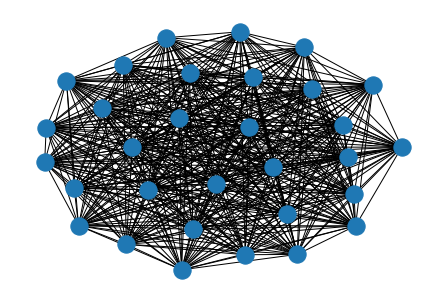

In [6]:
# plt.figure(figsize=(10, 10))
sentence_similarity_graph = nx.from_edgelist(edgelist=edge_list)
nx.draw(sentence_similarity_graph)

In [7]:
sentence_similarity_graph.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30))

## Split the embeddings dataset into stratified train and test sets

In [8]:
# from sklearn.model_selection import train_test_split
from sklearn.model_selection import GroupShuffleSplit

splitter = GroupShuffleSplit(train_size=0.8, random_state=42)
split = splitter.split(df, groups=df['File Number'])
train_ids, test_ids = next(split)

train_ids.shape, test_ids.shape

((10242,), (2488,))

In [9]:
train_data, test_data = df.iloc[train_ids], df.iloc[test_ids]
train_data.shape, test_data.shape

((10242, 303), (2488, 303))

# Implement Train and Evaluate Model Functions

In [10]:
hidden_units = [32, 32] # units/neurons for each dense layer
learning_rate = 0.01
dropout_rate = 0.5
num_epochs = 300
batch_size = 256

In [11]:
# Model compile and fit/train model
def compile_and_train(model, x_train, y_train):
    # Compile the model.
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
    )
    # Create an early stopping callback.
    early_stopping = keras.callbacks.EarlyStopping(
        monitor="val_acc", patience=50, restore_best_weights=True
    )
    # Fit the model.
    history = model.fit(
        x=x_train,
        y=y_train,
        epochs=num_epochs,
        batch_size=batch_size,
        validation_split=0.15,
        callbacks=[early_stopping],
    )

    return history


In [12]:
# Function to display the graphs for results
def display_learning_curves(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(history.history["loss"])
    ax1.plot(history.history["val_loss"])
    ax1.legend(["train", "test"], loc="upper right")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")

    ax2.plot(history.history["acc"])
    ax2.plot(history.history["val_acc"])
    ax2.legend(["train", "test"], loc="upper right")
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")
    plt.show()


# Create a FNN network model

In [13]:
def create_ffn(hidden_units, dropout_rate, name=None):
    fnn_layers = []

    for units in hidden_units:
        fnn_layers.append(layers.BatchNormalization())
        fnn_layers.append(layers.Dropout(dropout_rate))
        fnn_layers.append(layers.Dense(units, activation=tf.nn.relu))

    return keras.Sequential(fnn_layers, name=name)

# Build a Graph Neural Network Model

## Prepare the data for the graph model

Shape of:-

node_features = [num_nodes, num_features]

edges = [2, num_edges]

edge_weights = [num_edges]

In [14]:
first_article_df2 = first_article_df.head().drop(['File Number', 'Sentence Number', 'label'], axis=1)
first_article_df2.head()

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 291,Feature 292,Feature 293,Feature 294,Feature 295,Feature 296,Feature 297,Feature 298,Feature 299,Feature 300
0,-0.027220,0.276273,0.035666,0.259330,0.080364,-0.455986,0.182062,0.557229,0.087886,-0.055238,...,0.095979,0.299134,0.199428,-0.082511,0.227991,0.333926,0.007378,-0.083217,0.122136,-0.060975
1,-0.025229,0.266245,0.034133,0.244535,0.083147,-0.433831,0.173776,0.535270,0.090684,-0.050408,...,0.089285,0.287483,0.180521,-0.072131,0.220705,0.323355,0.003607,-0.078300,0.113948,-0.058102
2,-0.018368,0.316927,0.039583,0.286935,0.089186,-0.512217,0.216660,0.622174,0.104597,-0.061719,...,0.097978,0.332303,0.218579,-0.090416,0.262211,0.378674,0.001845,-0.087026,0.134146,-0.063993
3,-0.016162,0.271640,0.032396,0.259958,0.071536,-0.454813,0.192527,0.550243,0.086066,-0.061105,...,0.089343,0.287049,0.209071,-0.085688,0.224032,0.326525,0.010591,-0.080999,0.123257,-0.059658
4,-0.019569,0.227395,0.028845,0.213428,0.063403,-0.375795,0.153587,0.457931,0.073548,-0.047791,...,0.077414,0.244200,0.166518,-0.068898,0.187024,0.272929,0.006483,-0.068660,0.101584,-0.049696


In [15]:
edges = np.array(edge_list).T
edge_weights = tf.ones(shape=edges.shape[1])
node_features = tf.cast(
    first_article_df2.to_numpy(), dtype=tf.dtypes.float32
)

graph_info = (node_features, edges, edge_weights)

node_features.shape, edges.shape, edge_weights.shape

(TensorShape([5, 300]), (2, 465), TensorShape([465]))

## Graph Conv Layer

- Prepare
- Aggregate
- Update

In [16]:
class GraphConvLayer(layers.Layer):
    def __init__(
        self,
        hidden_units,
        dropout_rate=0.2,
        aggregation_type="mean",
        combination_type="concat",
        normalize=False,
        *args,
        **kwargs,
    ):
        super().__init__(*args, **kwargs)

        self.aggregation_type = aggregation_type
        self.combination_type = combination_type
        self.normalize = normalize

        self.ffn_prepare = create_ffn(hidden_units, dropout_rate)
        if self.combination_type == "gated":
            self.update_fn = layers.GRU(
                units=hidden_units,
                activation="tanh",
                recurrent_activation="sigmoid",
                dropout=dropout_rate,
                return_state=True,
                recurrent_dropout=dropout_rate,
            )
        else:
            self.update_fn = create_ffn(hidden_units, dropout_rate)

    def prepare(self, node_repesentations, weights=None):
        # node_repesentations shape is [num_edges, embedding_dim].
        messages = self.ffn_prepare(node_repesentations)
        if weights is not None:
            messages = messages * tf.expand_dims(weights, -1)
        return messages

    def aggregate(self, node_indices, neighbour_messages, node_repesentations):
        # node_indices shape is [num_edges].
        # neighbour_messages shape: [num_edges, representation_dim].
        # node_repesentations shape is [num_nodes, representation_dim]
        num_nodes = node_repesentations.shape[0]
        if self.aggregation_type == "sum":
            aggregated_message = tf.math.unsorted_segment_sum(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "mean":
            aggregated_message = tf.math.unsorted_segment_mean(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "max":
            aggregated_message = tf.math.unsorted_segment_max(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        else:
            raise ValueError(f"Invalid aggregation type: {self.aggregation_type}.")

        return aggregated_message

    def update(self, node_repesentations, aggregated_messages):
        # node_repesentations shape is [num_nodes, representation_dim].
        # aggregated_messages shape is [num_nodes, representation_dim].
        if self.combination_type == "gru":
            # Create a sequence of two elements for the GRU layer.
            h = tf.stack([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "concat":
            # Concatenate the node_repesentations and aggregated_messages.
            h = tf.concat([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "add":
            # Add node_repesentations and aggregated_messages.
            h = node_repesentations + aggregated_messages
        else:
            raise ValueError(f"Invalid combination type: {self.combination_type}.")

        # Apply the processing function.
        node_embeddings = self.update_fn(h)
        if self.combination_type == "gru":
            node_embeddings = tf.unstack(node_embeddings, axis=1)[-1]

        if self.normalize:
            node_embeddings = tf.nn.l2_normalize(node_embeddings, axis=-1)
        return node_embeddings

    def call(self, inputs):
        """Process the inputs to produce the node_embeddings.

        inputs: a tuple of three elements: node_repesentations, edges, edge_weights.
        Returns: node_embeddings of shape [num_nodes, representation_dim].
        """

        node_repesentations, edges, edge_weights = inputs
        # Get node_indices (source) and neighbour_indices (target) from edges.
        node_indices, neighbour_indices = edges[0], edges[1]
        # neighbour_repesentations shape is [num_edges, representation_dim].
        neighbour_repesentations = tf.gather(node_repesentations, neighbour_indices)

        # Prepare the messages of the neighbours.
        neighbour_messages = self.prepare(neighbour_repesentations, edge_weights)
        # Aggregate the neighbour messages.
        aggregated_messages = self.aggregate(
            node_indices, neighbour_messages, node_repesentations
        )
        # Update the node embedding with the neighbour messages.
        return self.update(node_repesentations, aggregated_messages)

# Implement a graph neural network node classifier

In [17]:
class GNNNodeClassifier(tf.keras.Model):
    def __init__(
        self,
        graph_info,
        num_classes,
        hidden_units,
        aggregation_type="sum",
        combination_type="concat",
        dropout_rate=0.2,
        normalize=True,
        *args,
        **kwargs,
    ):
        super().__init__(*args, **kwargs)

        # Unpack graph_info to three elements: node_features, edges, and edge_weight.
        node_features, edges, edge_weights = graph_info
        self.node_features = node_features
        self.edges = edges
        self.edge_weights = edge_weights
        # Set edge_weights to ones if not provided.
        if self.edge_weights is None:
            self.edge_weights = tf.ones(shape=edges.shape[1])
        # Scale edge_weights to sum to 1.
        self.edge_weights = self.edge_weights / tf.math.reduce_sum(self.edge_weights)

        # Create a process layer.
        self.preprocess = create_ffn(hidden_units, dropout_rate, name="preprocess")
        # Create the first GraphConv layer.
        self.conv1 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv1",
        )
        # Create the second GraphConv layer.
        self.conv2 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv2",
        )
        # Create a postprocess layer.
        self.postprocess = create_ffn(hidden_units, dropout_rate, name="postprocess")
        # Create a compute logits layer.
        self.compute_logits = layers.Dense(units=num_classes, name="logits")

    def call(self, input_node_indices):
        # Preprocess the node_features to produce node representations.
        x = self.preprocess(self.node_features)
        # Apply the first graph conv layer.
        x1 = self.conv1((x, self.edges, self.edge_weights))
        # Skip connection.
        x = x1 + x
        # Apply the second graph conv layer.
        x2 = self.conv2((x, self.edges, self.edge_weights))
        # Skip connection.
        x = x2 + x
        # Postprocess node embedding.
        x = self.postprocess(x)
        # Fetch node embeddings for the input node_indices.
        node_embeddings = tf.gather(x, input_node_indices)
        # Compute logits
        return self.compute_logits(node_embeddings)


In [18]:
gnn_model = GNNNodeClassifier(
    graph_info=graph_info,
    num_classes=2,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="gnn_model",
)

print("GNN output shape:", gnn_model([1, 10, 100]))

gnn_model.summary()


GNN output shape: tf.Tensor(
[[-0.1591897   0.18369982]
 [ 0.          0.        ]
 [ 0.          0.        ]], shape=(3, 2), dtype=float32)
Model: "gnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 preprocess (Sequential)     (5, 32)                   12016     
                                                                 
 graph_conv1 (GraphConvLayer  multiple                 5888      
 )                                                               
                                                                 
 graph_conv2 (GraphConvLayer  multiple                 5888      
 )                                                               
                                                                 
 postprocess (Sequential)    (5, 32)                   2368      
                                                                 
 logits (Dense)              multiple           

# Train the GNN model

In [19]:
# x_train = train_data['Sentence Number'].to_numpy()
x_train = first_article_df['Sentence Number'].to_numpy()
print(x_train.shape)
x_train

(31,)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
      dtype=int64)

In [20]:
y_train = first_article_df['label'].to_numpy()
y_train

array([0.08090269, 0.08755019, 0.08023304, 0.09394351, 0.1154037 ,
       0.07915089, 0.11396588, 0.0985963 , 0.1247675 , 0.08369386,
       0.07056602, 0.09173578, 0.07189505, 0.13477496, 0.15822116,
       0.12036651, 0.07675256, 0.09457301, 0.08932206, 0.06773226,
       0.11260282, 0.13799658, 0.28569663, 0.14009531, 0.24231225,
       0.0577394 , 0.08524569, 0.11618065, 0.12025116, 0.08777463,
       0.08054135])

In [21]:
history = compile_and_train(gnn_model, x_train, y_train)

Epoch 1/300
1/1 [==============================] - 6s 6s/step - loss: 0.7128 - acc: 0.0000e+00 - val_loss: 0.6832 - val_acc: 0.0000e+00
Epoch 2/300
1/1 [==============================] - 0s 101ms/step - loss: 0.6645 - acc: 0.0000e+00 - val_loss: 0.6734 - val_acc: 0.0000e+00
Epoch 3/300
1/1 [==============================] - 0s 67ms/step - loss: 0.6339 - acc: 0.0000e+00 - val_loss: 0.6636 - val_acc: 0.0000e+00
Epoch 4/300
1/1 [==============================] - 0s 76ms/step - loss: 0.6202 - acc: 0.0000e+00 - val_loss: 0.6540 - val_acc: 0.0000e+00
Epoch 5/300
1/1 [==============================] - 0s 70ms/step - loss: 0.5662 - acc: 0.0000e+00 - val_loss: 0.6445 - val_acc: 0.0000e+00
Epoch 6/300
1/1 [==============================] - 0s 70ms/step - loss: 0.5511 - acc: 0.0000e+00 - val_loss: 0.6352 - val_acc: 0.0000e+00
Epoch 7/300
1/1 [==============================] - 0s 72ms/step - loss: 0.5447 - acc: 0.0000e+00 - val_loss: 0.6260 - val_acc: 0.0000e+00
Epoch 8/300
1/1 [==================

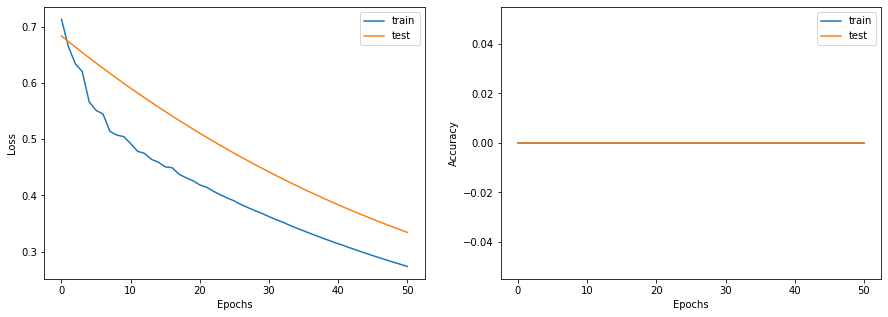

In [22]:
display_learning_curves(history)